## Source: https://github.com/xfold/LanguageBiasesInReddit/blob/master/RunNotebook.ipynb

In [9]:
from importlib import reload
import DADDBias_ICWSM
reload(DADDBias_ICWSM)

C:\Users\Andreas\anaconda3\lib\site-packages\numpy\_distributor_init.py:30: UserWarning: loaded more than 1 DLL from .libs:
C:\Users\Andreas\anaconda3\lib\site-packages\numpy\.libs\libopenblas.FB5AE2TYXYH2IJRDKGDGQ3XBKLKTF43H.gfortran-win_amd64.dll
C:\Users\Andreas\anaconda3\lib\site-packages\numpy\.libs\libopenblas.noijjg62emaszi6nyurl6jbkm4evbgm7.gfortran-win_amd64.dll
C:\Users\Andreas\anaconda3\lib\site-packages\numpy\.libs\libopenblas.PYQHXLVVQ7VESDPUVUADXEVJOBGHJPAY.gfortran-win_amd64.dll
  warnings.warn("loaded more than 1 DLL from .libs:"


<module 'DADDBias_ICWSM' from 'D:\\Studium\\Bachelorarbeit\\BA_Reddit\\experiments\\DADDBias_ICWSM.py'>

# Train a new embeddings model

# Get Biased Words Towards a Target Set 

In [2]:
import networkx as nx
from collections import Counter
import pandas as pd
import spacy
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure, text



Bad key figure.labelsize in file C:\Users\Andreas\anaconda3\lib\site-packages\matplotlib\mpl-data\stylelib\classic (2).mplstyle, line 310 ('figure.labelsize:   medium    # size of the figure label')
You probably need to get an updated matplotlibrc file from
https://github.com/matplotlib/matplotlib/blob/v3.5.3/matplotlibrc.template
or from the matplotlib source distribution

Bad key figure.labelweight in file C:\Users\Andreas\anaconda3\lib\site-packages\matplotlib\mpl-data\stylelib\classic (2).mplstyle, line 311 ('figure.labelweight: normal    # weight of the figure label')
You probably need to get an updated matplotlibrc file from
https://github.com/matplotlib/matplotlib/blob/v3.5.3/matplotlibrc.template
or from the matplotlib source distribution


In [3]:
'''
List of target sets used in this work, replace them in GetTopMostBiasedWords to obtain different sets of biases
or create your own target sets to represent a concept!
'''

women=["sister" , "female" , "woman" , "girl" , "daughter" , "she" , "hers" , "her"]
men=["brother" , "male" , "man" , "boy" , "son" , "he" , "his" , "him"]  


In [4]:
female_terms = []
male_terms = []

In [5]:
'''
Call GetTopMostBiasedWords to obtain a list of the topk words with POS = ['JJ','JJR','JJS'] 
most biased towards women and men target sets in the model.

The function returns two word lists, b1 and b2, which contain all words from the embedding model most biased towards
women (b1) and men (b2). 
'''

subreddits = ["TwoXChromosomes","gardening","Parenting",
"AskMen","AskWomen","unpopularopinion","teenagers",
              "funny","technology","science","Conservative"]
for i in subreddits:
    
    modelpath = f"../models/subreddit_level/fasttext_{i}_senti.bin"
    [b1,b2] = DADDBias_ICWSM.GetTopMostBiasedWords(
            modelpath,
            300,
            women,
            men,
            ['JJ','JJR','JJS'],
            True)
    terms_target_1 = [b['word'] for b in b1[:30]]
    terms_target_2 = [b['word'] for b in b2[:30]]
    female_terms.append(terms_target_1 )
    male_terms.append(terms_target_2)

...0...100...200...300...400...500...600...700...800...900...1000...1100...1200...1300...1400...1500...0...100...200...300...400...500...600...0...100...200...300...400...500...600...700...800...900...1000...1100...0...100...200...300...400...500...600...700...800...900...1000...1100...1200...1300...1400...1500...1600...1700...0...100...200...300...400...500...600...700...800...900...1000...1100...0...100...200...300...400...500...600...700...800...900...1000...1100...1200...1300...1400...1500...1600...1700...1800...0...100...200...300...400...500...600...700...800...900...1000...1100...1200...1300...1400...1500...1600...1700...1800...1900...0...100...200...300...400...500...600...700...800...900...1000...1100...1200...1300...1400...0...100...200...300...400...500...600...700...800...900...1000...1100...1200...1300...1400...1500...1600...1700...0...100...200...300...400...500...600...700...800...900...1000...1100...1200...1300...1400...1500...0...100...200...300...400...500...600...700

In [10]:
# Flat list the adjectives found per subreddit into a single list

flat_list_male_terms = [item for sublist in male_terms for item in sublist]

In [12]:
flat_list_female_terms = [item for sublist in female_terms for item in sublist]


In [9]:
# Count the occurence/intersection of adjectives between the subreddits

counter_male_terms = Counter(flat_list_male_terms)

In [10]:
counter_female_terms = Counter(flat_list_female_terms)

In [11]:
counter_female_terms

Counter({'obstetrician': 1,
         'identical': 2,
         'iranian': 1,
         'indian': 1,
         'joyous': 1,
         'limited': 1,
         'menstrual': 9,
         'scandalous': 1,
         'nulliparous': 1,
         'elective': 5,
         'unmarried': 4,
         'australian': 1,
         'nourish': 1,
         'indigenous': 2,
         'indiginous': 1,
         'due': 1,
         'permissible': 1,
         'available': 1,
         'nonviable': 2,
         'various': 1,
         'apocalyptic': 1,
         'american': 1,
         'medical': 2,
         'nonbinary': 3,
         'virtuous': 1,
         'partial': 1,
         'eligible': 1,
         'spontaneous': 2,
         'unfavorable': 1,
         'gynecological': 1,
         'eternal': 1,
         'annual': 1,
         'funeral': 1,
         'virtual': 1,
         'herbaceous': 1,
         'identifiable': 2,
         'glorious': 1,
         'reliable': 1,
         'fritillary': 1,
         'tremendous': 1,
         'bi

In [22]:
counter_female_terms.most_common(10)

[('menstrual', 9),
 ('unwanted', 6),
 ('elective', 5),
 ('gorgeous', 5),
 ('unplanned', 5),
 ('unmarried', 4),
 ('vaginal', 4),
 ('ovary', 4),
 ('consensual', 4),
 ('nonbinary', 3)]

In [12]:
counter_male_terms

Counter({'unempathetic': 1,
         'meticulous': 1,
         'egotistical': 2,
         'inexcusable': 1,
         'mumble': 2,
         'feeble': 1,
         'pathetic': 1,
         'unemotional': 1,
         'salvageable': 1,
         'unhinged': 1,
         'flirtatious': 1,
         'amicable': 1,
         'punchable': 1,
         'redeemable': 1,
         'sociopathic': 1,
         'introspective': 1,
         'trivial': 1,
         'venomous': 1,
         'idle': 1,
         'argumentative': 1,
         'spatial': 2,
         'teachable': 1,
         'unlovable': 1,
         'altruistic': 2,
         'unfunny': 1,
         'ramble': 1,
         'insurmountable': 1,
         'alarmed': 1,
         'personable': 1,
         'grumble': 2,
         'australian': 1,
         'electric': 1,
         'industrial': 1,
         'serial': 1,
         'sustainable': 1,
         'aerial': 2,
         'liberal': 1,
         'advanced': 2,
         'commercial': 1,
         'electrical': 1,


In [51]:
edges_female_terms = []
for i in range(len(subreddits)):
    for j in female_terms[i]:
        list_per_subreddit = [subreddits[i], j]
        edges_female_terms.append(list_per_subreddit)


In [185]:
edges_male_terms = []
for i in range(len(subreddits)):
    for j in male_terms[i]:
        list_per_subreddit = [subreddits[i], j]
        edges_male_terms.append(list_per_subreddit)


In [68]:
df_female = pd.DataFrame(edges_female_terms, columns=["subreddits","words"])

In [186]:
df_male = pd.DataFrame(edges_male_terms, columns=["subreddits","words"])

In [69]:
df_female

,subreddits,words
0,TwoXChromosomes,obstetrician
1,TwoXChromosomes,identical
2,TwoXChromosomes,iranian
3,TwoXChromosomes,indian
4,TwoXChromosomes,joyous
...,...,...
325,Conservative,unborn
326,Conservative,swedish
327,Conservative,neurotic
328,Conservative,indigenous


##  Source for Visualization: https://jonathansoma.com/lede/algorithms-2017/classes/networks/networkx-graphs-from-source-target-dataframe/

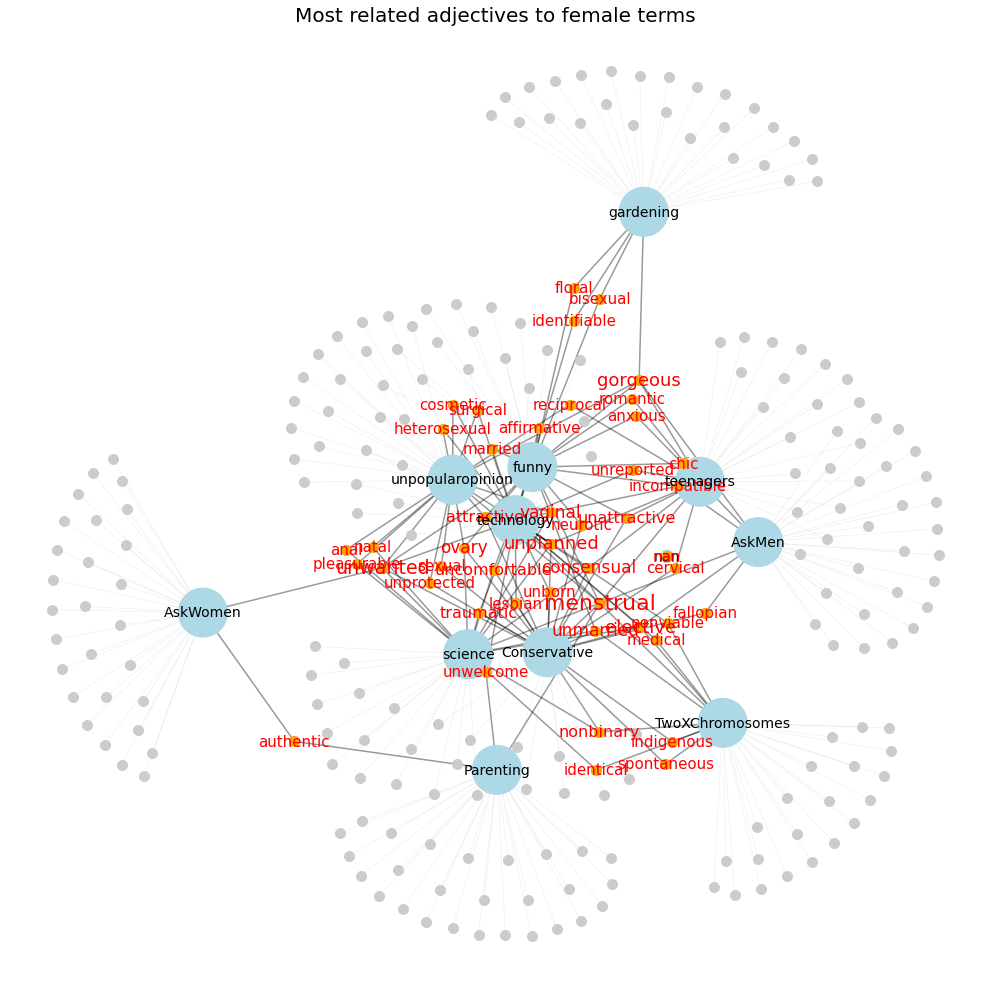

In [223]:
g = nx.from_pandas_edgelist(df_female, source='subreddits', target='words') 
subreddits = list(df_female.subreddits.unique())
words = list(df_female.words.unique())


plt.figure(3,figsize=(17.5,17.5) )
layout = nx.kamada_kawai_layout(g)


subreddits_size = [g.degree(subreddits) * 80 for subreddits in subreddits]
nx.draw_networkx_nodes(g, 
                       layout, 
                       nodelist=subreddits, 
                       node_size=subreddits_size, # a LIST of sizes, based on g.degree
                       node_color='lightblue')
nx.draw_networkx_nodes(g, layout, nodelist=words, node_color='#cccccc', node_size=100)
popular_words = [words for words in words if g.degree(words) > 2]

node_labels_2 =  dict(zip(words, words))
nx.draw_networkx_nodes(g, layout, nodelist=popular_words, node_color='orange', node_size=100 )

for u,v,a in g.edges(data=True):
    if v in popular_words or u in popular_words:
        g[u][v]['weight'] = 1.5
        g[u][v]["color"] = 'black'
    else:
        g[u][v]['weight'] = 0.5
        g[u][v]["color"] = '#cccccc'

widths = nx.get_edge_attributes(g, 'weight')
colors = nx.get_edge_attributes(g, 'color')

nx.draw_networkx_edges(g, layout, width=list(widths.values()), edge_color=list(colors.values()), alpha=0.4)  #"#cccccc"
    

        
node_labels = {**dict(zip(subreddits, subreddits)) , **dict(zip(popular_words,popular_words))}


for node in g:
    if node in subreddits:
        nx.draw_networkx_labels(g, layout, labels={node:node}, font_color="black" , alpha=1, font_size=14)
    if node in popular_words:
        nx.draw_networkx_labels(g, layout, labels={node:node}, font_color="red" , font_size=13 + g.degree[node], alpha=1)

plt.axis('off')

plt.title("Most related adjectives to female terms", fontsize= 20)

plt.savefig("Graph.png", format="PNG")
plt.show()


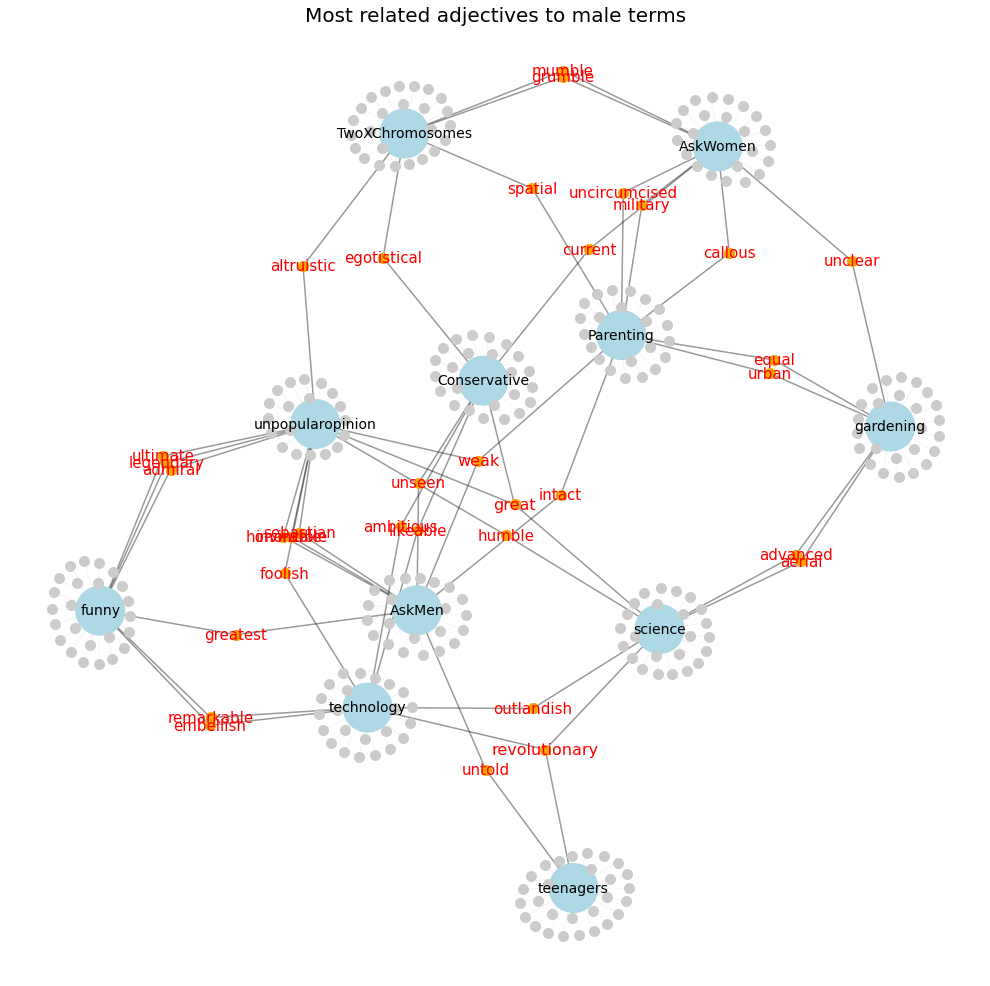

In [218]:
g2 = nx.from_pandas_edgelist(df_male, source='subreddits', target='words') 


subreddits = list(df_male.subreddits.unique())

words = list(df_male.words.unique())

plt.figure(3,figsize=(17.5,17.5) )

layout = nx.kamada_kawai_layout(g2)


subreddits_size = [g2.degree(subreddits) * 80 for subreddits in subreddits]
nx.draw_networkx_nodes(g2, 
                       layout, 
                       nodelist=subreddits, 
                       node_size=subreddits_size, # a LIST of sizes, based on g.degree
                       node_color='lightblue')
nx.draw_networkx_nodes(g2, layout, nodelist=words, node_color='#cccccc', node_size=100)
popular_words = [words for words in words if g2.degree(words) > 1]
node_labels_2 =  dict(zip(words, words))
nx.draw_networkx_nodes(g2, layout, nodelist=popular_words, node_color='orange', node_size=100 )

for u,v,a in g2.edges(data=True):
    if v in popular_words or u in popular_words:
        g2[u][v]['weight'] = 1.5
        g2[u][v]["color"] = 'black'
    else:
        g2[u][v]['weight'] = 0.5
        g2[u][v]["color"] = '#cccccc'

widths = nx.get_edge_attributes(g2, 'weight')
colors = nx.get_edge_attributes(g2, 'color')

nx.draw_networkx_edges(g2, layout, width=list(widths.values()), edge_color=list(colors.values()), alpha=0.4)  #"#cccccc"
    

        
node_labels = {**dict(zip(subreddits, subreddits)) , **dict(zip(popular_words,popular_words))}


for node in g2:
    if node in subreddits:
        nx.draw_networkx_labels(g2, layout, labels={node:node}, font_color="black" , alpha=1, font_size=14)
    if node in popular_words:
        nx.draw_networkx_labels(g2, layout, labels={node:node}, font_color="red" , font_size=13 + g2.degree[node], alpha=1)

plt.axis('off')

plt.title("Most related adjectives to male terms", fontsize= 20)

plt.savefig("Graph.png", format="PNG")
plt.show()


# Cluster Biased Words into Concepts

In [6]:
import spacy
nlp = spacy.load('en_core_web_sm', exclude=['parser', 'ner'])


In [7]:
english_tagger_pipeline = spacy.load('en_dual_none_contextual')


In [8]:
nlp.add_pipe('pymusas_rule_based_tagger', source=english_tagger_pipeline)


In [13]:
df_female_tags = pd.DataFrame(flat_list_female_terms, columns=["Words"])

In [19]:
df_female_tags["tags"] = df_female_tags.apply(lambda x: str([token._.pymusas_tags for token in nlp(x["Words"])]),  axis=1)

In [20]:
df_female_tags

,Words,tags
0,obstetrician,[['Z99']]
1,identical,[['A6.1+++']]
2,iranian,"[['Z2', 'Z2/Q3']]"
3,indian,[['Z2']]
4,joyous,[['E4.1+']]
...,...,...
325,unborn,[['B1']]
326,swedish,"[['Z2', 'Z2/Q3', 'Z2/S2mfnc']]"
327,neurotic,[['B2-/X1']]
328,indigenous,[['M7']]


In [23]:
# Count occurences for USAS tags regarding female related adjectives

df_female_tags.groupby(["tags"]).size().reset_index(name="Amount of tag").sort_values("Amount of tag", ascending=False)

,tags,Amount of tag
163,[['Z99']],61
42,[['B1']],17
96,[['O4.2+']],10
157,[['X7-']],10
48,[['B3']],8
...,...,...
57,"[['E4.2-', 'A1.2-']]",1
55,"[['E4.1-', 'E2-', 'A1.4-']]",1
54,[['E4.1+']],1
53,[['E3-/S1.2']],1


In [24]:
df_male_tags = pd.DataFrame(flat_list_male_terms, columns=["Words"])

In [25]:
df_male_tags["tags"] = df_male_tags.apply(lambda x: str([token._.pymusas_tags for token in nlp(x["Words"])]),  axis=1)

In [27]:
df_male_tags

,Words,tags
0,unempathetic,[['Z99']]
1,meticulous,[['A1.3+']]
2,egotistical,[['S1.2.3+']]
3,inexcusable,[['Z99']]
4,mumble,[['Q2.2/X3.2-']]
...,...,...
325,bumble,[['Q2.1']]
326,current,[['T1.1.2']]
327,antic,[['K1/E4.1+/S2mf']]
328,influential,"[['S7.1+', 'A2.2']]"


In [26]:
# Count occurences for USAS tags regarding male related adjectives

df_male_tags.groupby(["tags"]).size().reset_index(name="Amount of tag").sort_values("Amount of tag", ascending=False)

,tags,Amount of tag
197,[['Z99']],71
51,[['A6.2-']],7
109,[['N4']],3
30,"[['A5.1+', 'A11.1+', 'N3.2+', 'N5+', 'X5.2+', ...",3
23,[['A13.3']],3
...,...,...
73,"[['F3', 'X5.2++']]",1
74,[['F4']],1
75,[['F4/M7']],1
76,"[['G1.1', 'S1.2.4+', 'G2.1', 'H1%']]",1
